In [70]:
import numpy as np

def kmeans(ds, k):
    """k-means聚类算法
    
    k       - 指定分簇数量
    ds      - ndarray(m, n)，m个样本的数据集，每个样本n个属性值
    """
    
    m, n = ds.shape # m：样本数量，n：每个样本的属性值个数
    result = np.empty(m, dtype=np.int) # m个样本的聚类结果
    cores = ds[np.random.choice(np.arange(m), k, replace=False)] # 从m个数据样本中不重复地随机选择k个样本作为质心
    
    while True: # 迭代计算
        d = np.square(np.repeat(ds, k, axis=0).reshape(m, k, n) - cores)
        distance = np.sqrt(np.sum(d, axis=2)) # ndarray(m, k)，每个样本距离k个质心的距离，共有m行
        index_min = np.argmin(distance, axis=1) # 每个样本距离最近的质心索引序号
        
        if (index_min == result).all(): # 如果样本聚类没有改变
            return result, cores # 则返回聚类结果和质心数据
        
        result[:] = index_min # 重新分类
        for i in range(k): # 遍历质心集
            items = ds[result==i] # 找出对应当前质心的子样本集
            cores[i] = np.mean(items, axis=0) # 以子样本集的均值作为当前质心的位置

In [71]:
ds = np.array([[1, 2], [3, 6], [10, 8], [2, 4]])
kmeans(ds, 2)

(array([1, 1, 0, 1]), array([[10,  8],
        [ 2,  4]]))

In [72]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

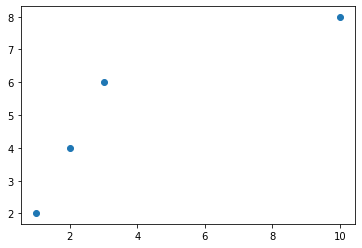

In [73]:
x = [data[0] for data in ds]
y = [data[1] for data in ds]
plt.scatter(x, y)
plt.show